# Regresion Lineal: Costo de un incidente de seguridad
En este ejercicio se explican los fundamentos de la regresion lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad

## Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un incidente de seguridad en base al número de equipos afectados. El DataSet en generado de manera aleatoria

### 1.- Generacion del DataSet 

In [5]:
import numpy as np 
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

print("La longitud del DataSet es: ", len(x))

La longitud del DataSet es:  100


### 2.- Visualizacion del DataSet

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

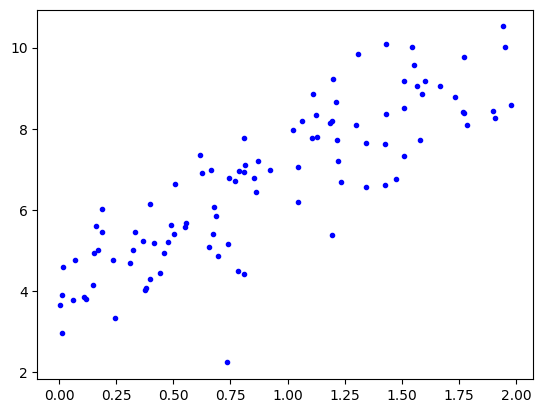

In [7]:
plt.plot(x, y, 'b.')
plt.show()

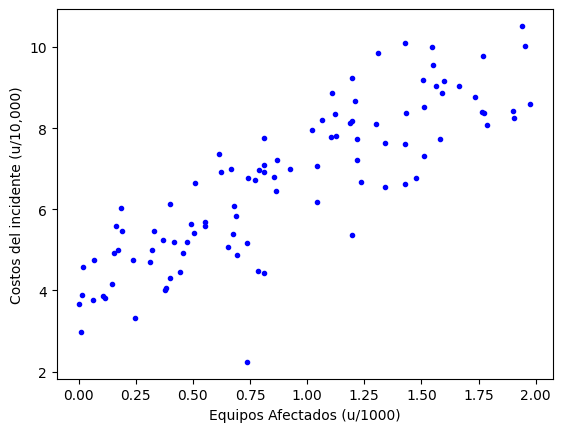

In [8]:
plt.plot(x, y, 'b.')
plt.xlabel("Equipos Afectados (u/1000)")
plt.ylabel("Costos del incidente (u/10,000)")
plt.show()

### 3.-Modicicación del DataSet

In [9]:
import pandas as pd
data = {'No_Equipos_Afectados': x.flatten(), 'Costo': y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipos_Afectados,Costo
0,0.742221,6.778603
1,0.417375,5.188896
2,0.398732,6.142328
3,0.625198,6.916494
4,1.951670,10.019089
5,0.665228,6.986633
6,0.492262,5.630824
7,1.771885,8.382204
8,0.162801,5.593274
9,1.940364,10.518614


In [10]:
# Escalado del numero de equipos afectados
df["No_Equipos_Afectados"] = df ["No_Equipos_Afectados"] * 1000
df["No_Equipos_Afectados"] = df ["No_Equipos_Afectados"].astype('int')
#Escalado del costo
df["Costo"] = df ['Costo'] * 10000
df['Costo'] = df ['Costo'].astype('int')
df.head(10)

,No_Equipos_Afectados,Costo
0,742,67786
1,417,51888
2,398,61423
3,625,69164
4,1951,100190
5,665,69866
6,492,56308
7,1771,83822
8,162,55932
9,1940,105186


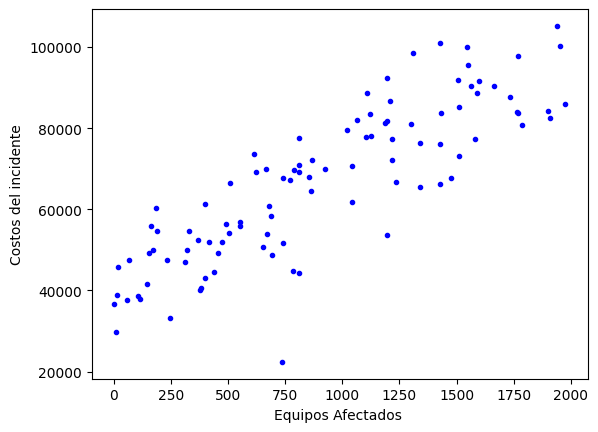

In [11]:
# Representacion grafica del DataSet
plt.plot(df['No_Equipos_Afectados'], df['Costo'], 'b.')
plt.xlabel("Equipos Afectados ")
plt.ylabel("Costos del incidente")
plt.show()

### 4.- Construcción del Modelo

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# Construcion del modelo y ajuste de la funcion de Hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df['No_Equipos_Afectados'].values.reshape(-1, 1), df['Costo'].values)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
# Obtener el parametro Theta 0
lin_reg.intercept_

np.float64(40497.21998372316)

In [15]:
# Parametro de Theta 1
lin_reg.coef_

array([28.72203354])

In [16]:
# Prediccion para el valor minimo y maximo del DataSet de entrenamiento
x_min_max = np.array([[df["No_Equipos_Afectados"].min()], [df['No_Equipos_Afectados'].max()]])
pred = lin_reg.predict(x_min_max)